# **Machine Learning-based Prediction of Drug Efficacy Targeting FEN1 for Cancer Therapy**

Current idea: Targeting FEN1 has been verified as an effective strategy in mono or combined treatment of cancer. We will build machine learning models to predict the efficacy of potential drugs towards FEN1. In this notebook, we will peform exploratory data analysis.

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9312813/

## **Collecting bioassay data**
We will collect bioassay data of FEN1 from PubChem database. Directly download the dataset from the website below.

https://pubchem.ncbi.nlm.nih.gov/bioassay/588795

In [1]:
# import library
import pandas as pd

df = pd.read_csv('/kaggle/input/aid588795/AID_588795_datatable_all.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,9,10,11,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Data pre-processing**

### **Data cleaning**

In [2]:
df.dropna(subset=['PUBCHEM_EXT_DATASOURCE_SMILES' ], inplace=True)
df.reset_index(drop=True, inplace=True)
df_sub = df[['PUBCHEM_CID', 'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE', 'Phenotype', 'Potency', 'Efficacy', 'Fit_LogAC50']]
display(df_sub)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50
0,50897788.0,CNCC1=NC2=C(C=C(C=C2)Cl)C(=N1)C3=CC=CN3,Inconclusive,10.0,Inhibitor,79.4328,55.1668,-4.1
1,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN
2,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5
3,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN
4,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
391248,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN
391249,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN
391250,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN
391251,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN


## **Exploratory data analysis**

In [3]:
# import library
import seaborn as sns
from matplotlib import pyplot as plt

### **All compounds**

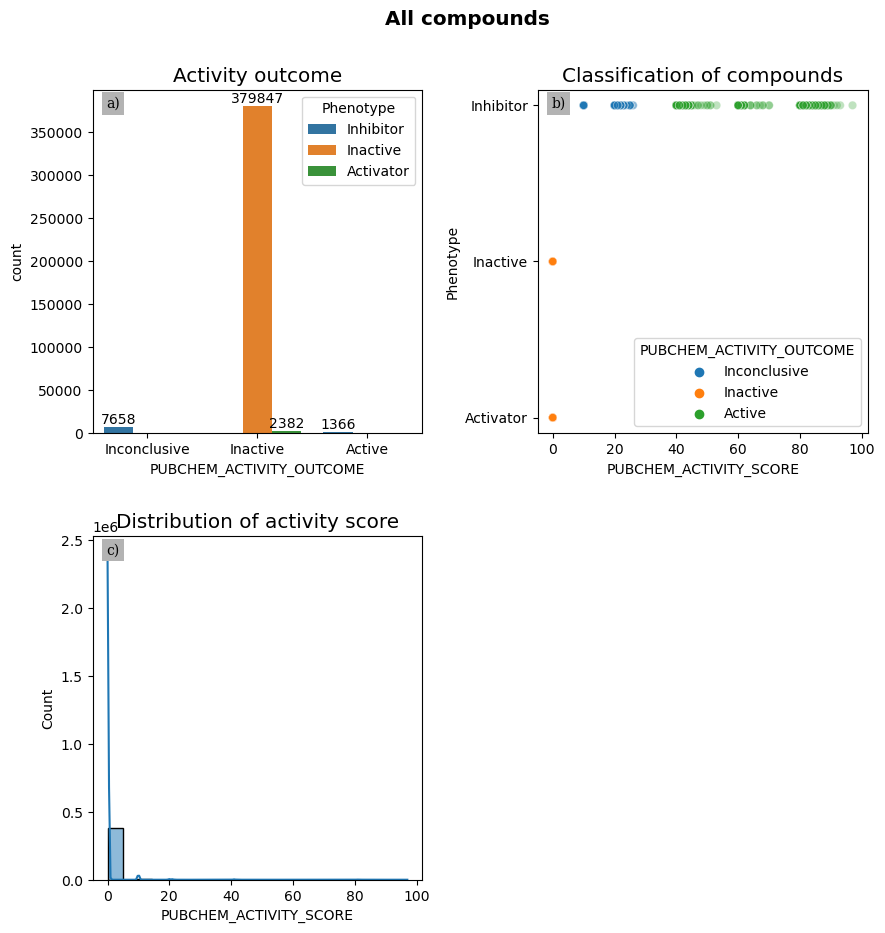

In [4]:
fig, axes = plt.subplot_mosaic([['a)', 'b)'], ['c)', 'd)']])
import matplotlib.transforms as mtransforms

for label, ax in axes.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

fig.set_size_inches(10, 10)
fig.subplots_adjust(wspace=0.35, hspace=0.3, top=0.9)
st = fig.suptitle("All compounds", weight='bold', fontsize='x-large')

ax1 = sns.countplot(x='PUBCHEM_ACTIVITY_OUTCOME', data=df_sub, hue='Phenotype', ax=axes['a)'])
ax1.set_title('Activity outcome', fontsize='x-large')
for p in ax1.patches:
    if p.get_height() > 0:
        ax1.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext = (0, 5), 
                    textcoords='offset points',
                    ha ='center', va='center')

ax2 = sns.scatterplot(x='PUBCHEM_ACTIVITY_SCORE', y='Phenotype', data=df_sub, hue='PUBCHEM_ACTIVITY_OUTCOME', alpha=0.3, ax=axes['b)'])
ax2.set_title('Classification of compounds', fontsize='x-large')

ax3 = sns.histplot(x=df_sub.loc[:, 'PUBCHEM_ACTIVITY_SCORE'], kde=True, ax=axes['c)'])
ax3.set_title('Distribution of activity score', fontsize='x-large')

fig.delaxes(axes['d)'])
plt.savefig('all_compounds.png')
plt.show()

In [5]:
haha = []
for i in range(len(df_sub)):
    if df_sub.loc[i, 'Phenotype'] == 'Inhibitor':
        haha.append('Positive')
    else:
        haha.append('Negative')
        
df_sub['Inhibitor'] = haha
display(df_sub)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,50897788.0,CNCC1=NC2=C(C=C(C=C2)Cl)C(=N1)C3=CC=CN3,Inconclusive,10.0,Inhibitor,79.4328,55.1668,-4.1,Positive
1,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive
3,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
391248,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391249,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391250,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391251,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


### **Positive compounds**
We consider all active compounds and part of inconclusive compounds as positive compounds that can **inhibit FEN1**.

In [6]:
df_active = df_sub.loc[df_sub['PUBCHEM_ACTIVITY_OUTCOME'] == 'Active', :].reset_index(drop=True)
df_inconclusive = df_sub.loc[df_sub['PUBCHEM_ACTIVITY_OUTCOME'] == 'Inconclusive', :]
df_inconclusive_sampled = df_inconclusive.sample(n=len(df_active))
df_positive = pd.concat([df_active, df_inconclusive_sampled]).reset_index(drop=True)
# df_positive = df_active
display(df_positive)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive
1,6623240.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=CC=C(C=C3)Cl,Active,80.0,Inhibitor,39.8107,93.9578,-4.4,Positive
2,16196968.0,CC1=CC(=C(C(=C1)O)OC2=CC(=CC(=C2O)O)C)O,Active,41.0,Inhibitor,50.1187,92.431,-4.3,Positive
3,160115.0,CC1CC(=O)C2=C(O1)C=C3C(=C2O)C(=CC(=C3C4=C(C=C(...,Active,82.0,Inhibitor,14.1254,101.357,-4.85,Positive
4,638759.0,C1=CC(=CC=C1C(=O)CCO)O,Active,81.0,Inhibitor,22.3872,97.3288,-4.65,Positive
...,...,...,...,...,...,...,...,...,...
2727,2328832.0,COC1=CC=CC=C1N2CCN(CC2)C3=NC4=CC=CC5=C4C3=CC=C5,Inconclusive,10.0,Inhibitor,44.6684,26.9561,-4.35,Positive
2728,26783340.0,CN(CC(=O)NC1=CC=CC=C1C(F)(F)F)C(=O)C2=CC3=C(C=...,Inconclusive,10.0,Inhibitor,89.1251,88.0473,-4.05,Positive
2729,135498034.0,COC1=CC2=C(CCC3=C2N=C(S3)/N=C/C4=C(C=CC5=CC=CC...,Inconclusive,10.0,Inhibitor,79.4328,34.1231,-4.1,Positive
2730,67485.0,C1C2=CC=CC=C2C3=NC4=CC=CC=C4C=C31,Inconclusive,20.0,Inhibitor,39.8107,86.2529,-4.4,Positive


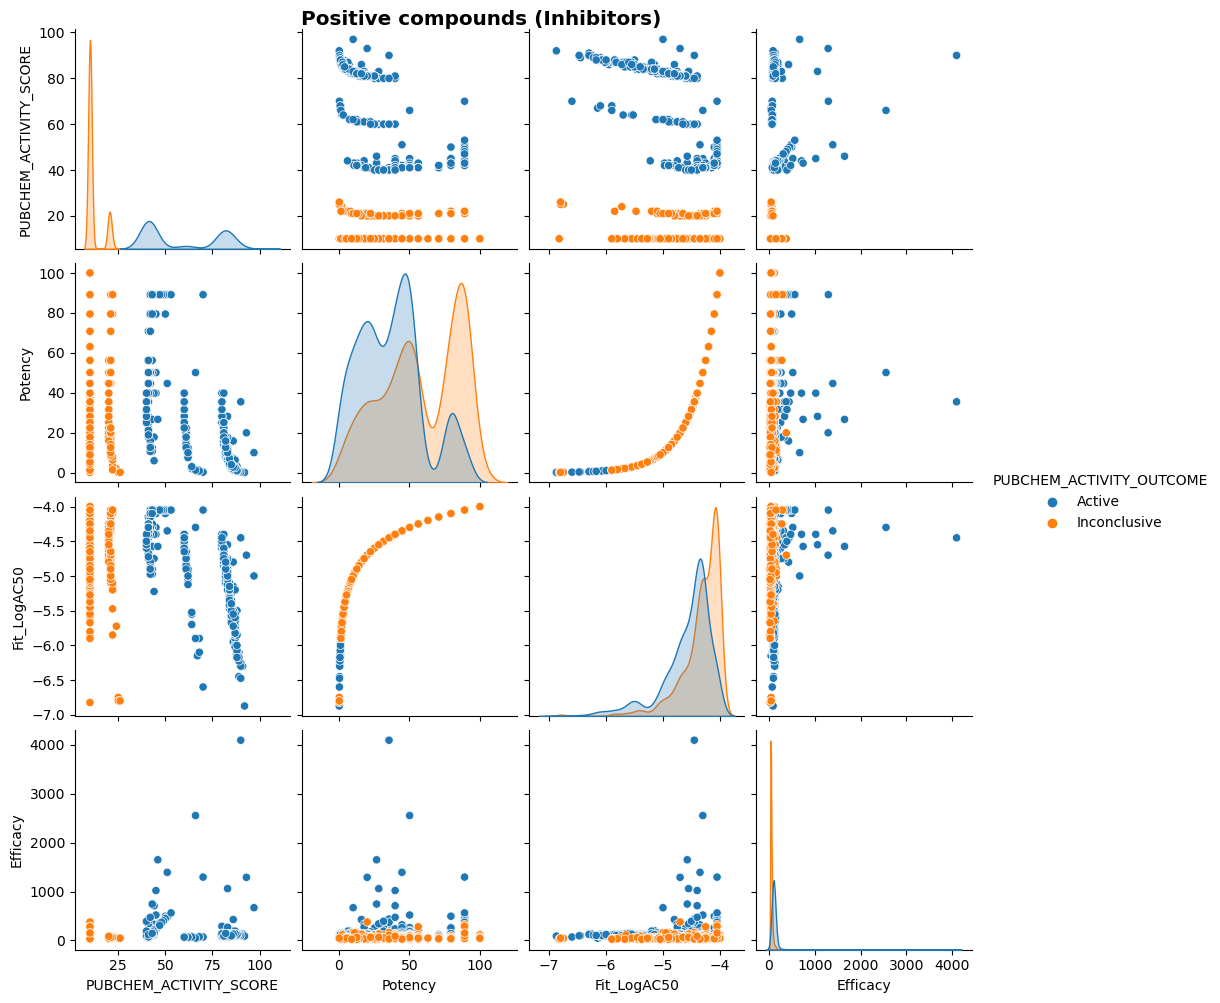

In [7]:
a = df_positive[['PUBCHEM_ACTIVITY_SCORE', 'Potency', 'Fit_LogAC50', 'Efficacy']].astype(float)
b = df_positive['PUBCHEM_ACTIVITY_OUTCOME']
df_positive_plot = pd.concat([a, b], axis=1)

g = sns.pairplot(data=df_positive_plot, hue='PUBCHEM_ACTIVITY_OUTCOME', height=2.5)
g.fig.suptitle('Positive compounds' + ' (' + 'Inhibitors' + ')', weight='bold', fontsize='x-large', x=0.4, y=1)

plt.savefig('positive.png')
plt.show()

### **Negative compounds**
We consider all inactive compounds as negative compounds, which are either **activator** or have **no effect on FEN1**. To balance the data, we will randomly sample from the negative compounds and choose a number of negative compounds equal to the number of positive compounds in the dataset.

In [8]:
df_negative = df_sub.loc[df_sub['Inhibitor'] == 'Negative', :].reset_index(drop=True)
display(df_negative)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
3,44142107.0,CC1=C(C(=C(C=C1)F)CN2C=NC3=C(C2=O)C=NN3C(C)(C)...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,53314908.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C=CC(=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
382224,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382225,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382226,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382227,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


In [9]:
df_negative_sampled = df_negative.sample(n=len(df_active), random_state=0).reset_index(drop=True)
display(df_negative_sampled)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,5309773.0,CCN(CC)C(=O)C1CCC(CC1)CNS(=O)(=O)C2=CC=CC3=C2N...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1,9622798.0,C1CC(C(=O)NC1)C(=O)N/N=C/C2=CC(=CC=C2)[N+](=O)...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,1292315.0,C1=CC=C(C=C1)C(C2=CC=CC=C2)NC(=O)C3=CC=C(O3)Br,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
3,16032653.0,CC1=CC(=C2C(=C1)SC(=N2)N3CCN(CC3)C(=O)C4=CC5=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,16008216.0,CC1=CC(=C(C=C1)NC(=O)CN(C2=CC(=CC(=C2)C)C)S(=O...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
1361,2948675.0,C1CC(OC1)CNC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1362,5344764.0,CCOC1=C(C=CC(=C1)/C=C(\C#N)/C(=O)NCC2CCCO2)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1363,16023553.0,COCCNC1=C2C(=NOC2=NC=N1)C3=CC=C(C=C3)F,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1364,53315068.0,CC(=O)NNC(=C)C1=CC=C(C=C1)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


### **Calculate Lipinski descriptors**

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [10]:
# # Downloading rdkit library
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 33.5 MB/s eta 0:00:00


In [11]:
# importing library
import numpy as np
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [12]:
def lipinski(smile):
    mol = Chem.MolFromSmiles(smile)
    
    MolWt = Descriptors.MolWt(mol)
    MolLogP = Descriptors.MolLogP(mol)
    NumHDonors = Lipinski.NumHDonors(mol)
    NumHAcceptors = Lipinski.NumHAcceptors(mol)
    
    desc = {'MolWt':MolWt, 'LogP':MolLogP, 'NumHDonors':NumHDonors, 'NumHAcceptors':NumHAcceptors}
    return desc

In [13]:
df_sample = pd.concat([df_positive, df_negative_sampled]).reset_index(drop=True)

desc_dict = []
for i in tqdm(range(len(df_sample))):
    desc = lipinski(df_sample.loc[i, 'PUBCHEM_EXT_DATASOURCE_SMILES'])
    desc_dict.append(desc)
    
df_lipinski = pd.DataFrame(data=desc_dict, columns=['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors'])

100%|██████████| 4098/4098 [00:03<00:00, 1197.17it/s]


In [14]:
df_combined = pd.concat([df_sample, df_lipinski], axis=1)
display(df_combined)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor,MolWt,LogP,NumHDonors,NumHAcceptors
0,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive,746.885,5.02690,0,10
1,6623240.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=CC=C(C=C3)Cl,Active,80.0,Inhibitor,39.8107,93.9578,-4.4,Positive,316.792,3.04970,0,5
2,16196968.0,CC1=CC(=C(C(=C1)O)OC2=CC(=CC(=C2O)O)C)O,Active,41.0,Inhibitor,50.1187,92.431,-4.3,Positive,262.261,2.91814,4,5
3,160115.0,CC1CC(=O)C2=C(O1)C=C3C(=C2O)C(=CC(=C3C4=C(C=C(...,Active,82.0,Inhibitor,14.1254,101.357,-4.85,Positive,518.474,4.60100,6,10
4,638759.0,C1=CC(=CC=C1C(=O)CCO)O,Active,81.0,Inhibitor,22.3872,97.3288,-4.65,Positive,166.176,0.95730,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,2948675.0,C1CC(OC1)CNC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative,369.377,2.75590,2,5
4094,5344764.0,CCOC1=C(C=CC(=C1)/C=C(\C#N)/C(=O)NCC2CCCO2)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative,316.357,1.99308,2,5
4095,16023553.0,COCCNC1=C2C(=NOC2=NC=N1)C3=CC=C(C=C3)F,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative,288.282,2.48220,1,6
4096,53315068.0,CC(=O)NNC(=C)C1=CC=C(C=C1)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative,192.218,1.00360,3,3


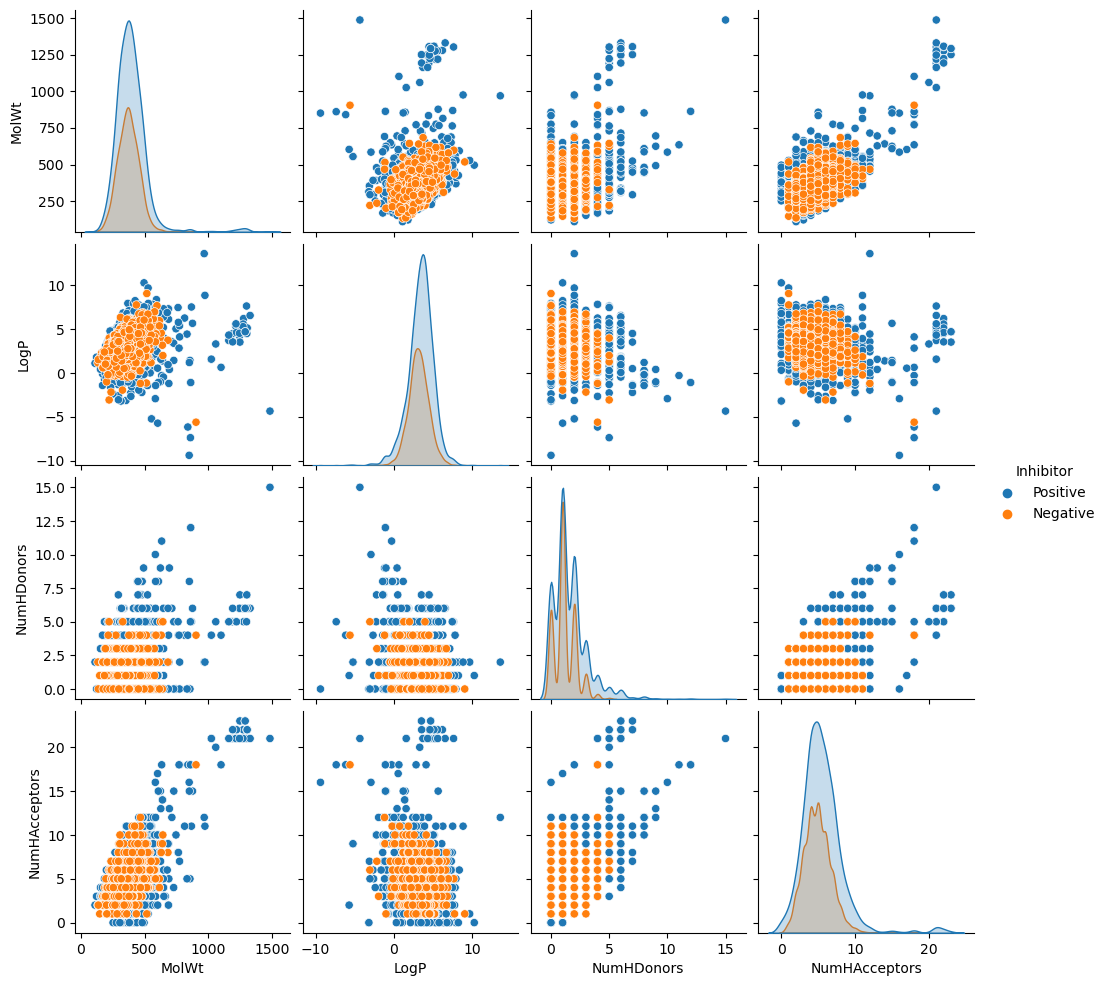

In [15]:
sns.pairplot(data=df_combined, vars=['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors'], hue='Inhibitor')

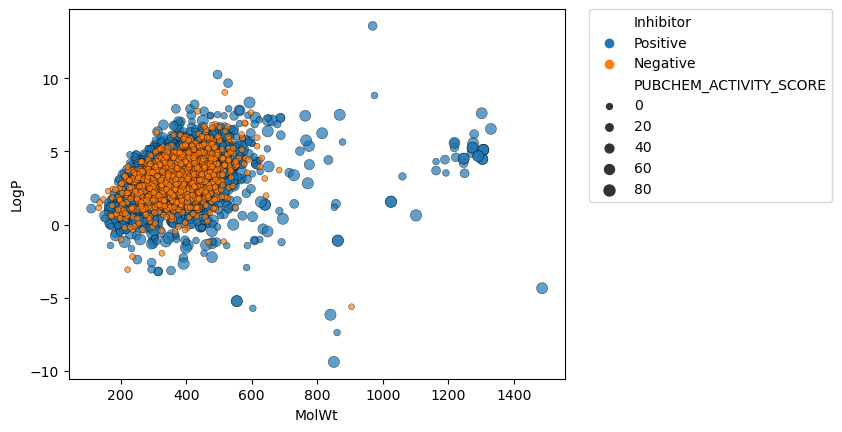

In [16]:
sns.scatterplot(x='MolWt', y='LogP', data=df_combined, hue='Inhibitor', size='PUBCHEM_ACTIVITY_SCORE', edgecolor='black', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

## **Box plots**

### **MolWt**

<AxesSubplot:xlabel='Inhibitor', ylabel='MolWt'>

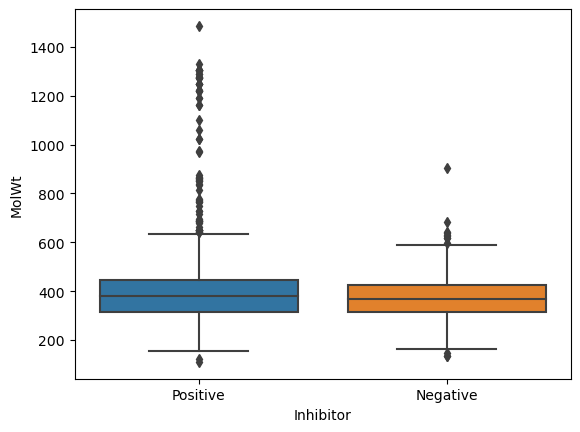

In [17]:
sns.boxplot(x='Inhibitor', y = 'MolWt', data = df_combined)

### **Statistical analysis | t-test**

In [18]:
def ttest(descriptor):
    from scipy.stats import ttest_ind

    # positive and negative compounds
    positive = df_combined[df_combined['Inhibitor'] == 'Positive'][descriptor]
    negative = df_combined[df_combined['Inhibitor'] == 'Negative'][descriptor]
#     df_negative_sampled = negative.sample(n=len(df_active))
    
    # compare samples
    stat, p = ttest_ind(positive, negative)

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor, 'Statistics':stat, 'p':p, 'alpha':alpha, 'Interpretation':interpretation}, index=[0])
    return results

In [19]:
ttest('MolWt')

,Descriptor,Statistics,p,alpha,Interpretation
0,MolWt,5.772398,8.393552e-09,0.05,Different distribution (reject H0)


### **Statistical analysis | Mann-Whitney U Test**

The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

Reference:
https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

In [20]:
def mannwhitney(descriptor):
    from scipy.stats import mannwhitneyu

    # positive and negative compounds
    positive = df_combined[df_combined['Inhibitor'] == 'Positive'][descriptor]
    negative = df_combined[df_combined['Inhibitor'] == 'Negative'][descriptor]
#     df_negative_sampled = negative.sample(n=len(df_active))
    
    # compare samples
    stat, p = mannwhitneyu(positive, negative)

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor, 'Statistics':stat, 'p':p, 'alpha':alpha, 'Interpretation':interpretation}, index=[0])
    return results

In [21]:
mannwhitney('MolWt')

,Descriptor,Statistics,p,alpha,Interpretation
0,MolWt,2005431.0,0.000094,0.05,Different distribution (reject H0)


### **LogP**

<AxesSubplot:xlabel='Inhibitor', ylabel='LogP'>

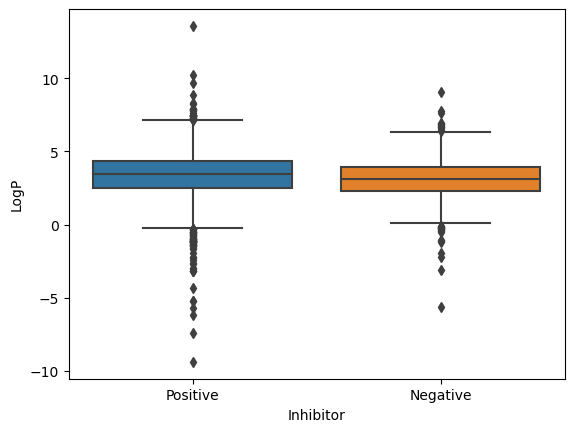

In [22]:
sns.boxplot(x='Inhibitor', y = 'LogP', data = df_combined)

In [23]:
ttest('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4.565287,0.000005,0.05,Different distribution (reject H0)


In [24]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2110158.5,7.937547e-12,0.05,Different distribution (reject H0)


### **NumHDonors**

<AxesSubplot:xlabel='Inhibitor', ylabel='NumHDonors'>

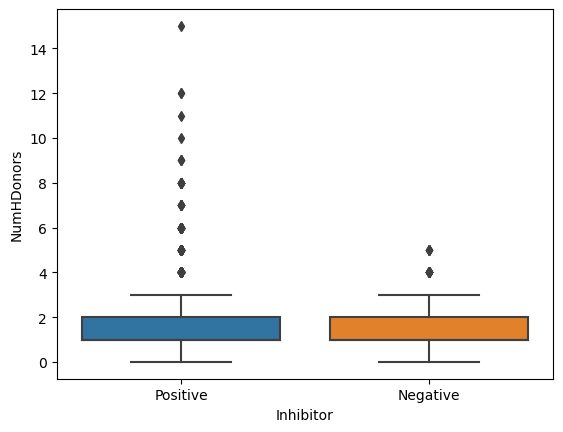

In [25]:
sns.boxplot(x='Inhibitor', y = 'NumHDonors', data = df_combined)

In [26]:
ttest('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,9.729657,3.906170e-22,0.05,Different distribution (reject H0)


In [27]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2127150.0,1.842516e-14,0.05,Different distribution (reject H0)


### **NumHAcceptors**

<AxesSubplot:xlabel='Inhibitor', ylabel='NumHAcceptors'>

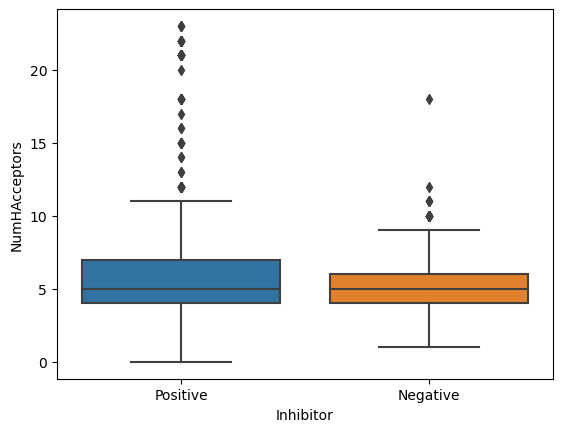

In [28]:
sns.boxplot(x='Inhibitor', y = 'NumHAcceptors', data = df_combined)

In [29]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2093765.0,1.074627e-10,0.05,Different distribution (reject H0)
